# Data fitting and regression

Let us imagine we measure the thickness of a book for different number of pages. We count the number of pages (variable book pages) and use a Vernier to measure the thickness in units of $\rm mm$.

Then, we save the experimental data into a file named: **"books.dat"**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# read_csv returns a DataFrame, which is two-dimensional data structure with labeled axes.

data = pd.read_csv("books.dat", sep = "\s+")
print(data) # Uncomment to print data

    N  Pages  Thickness
0   1     10        3.0
1   2     20        4.5
2   3     30        5.5
3   4     40        7.0
4   5     50        8.0
5   6     60        9.0
6   7     70        9.5
7   8     80       11.1
8   9     90       12.0
9  10    100       12.9


In [4]:
# To get the data from specific columns, you can use their respective keys, e.g.:

N = data["N"]
pages = data["Pages"]
thickness = data["Thickness"]

print(pages)

0     10
1     20
2     30
3     40
4     50
5     60
6     70
7     80
8     90
9    100
Name: Pages, dtype: int64


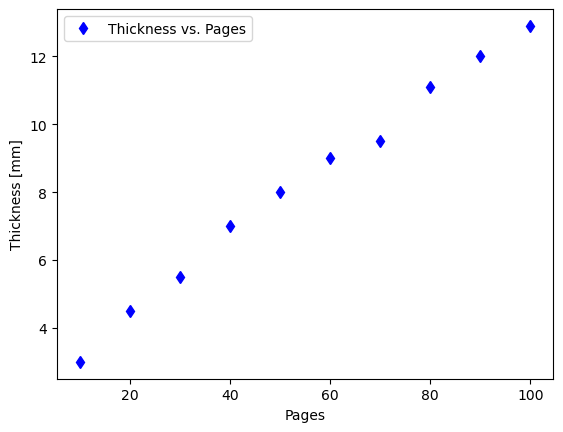

In [5]:
# And now we plot
fig, ax = plt.subplots()

ax.plot(pages,thickness,color='blue', marker = "d", linestyle=" ", label="Thickness vs. Pages")
ax.set_xlabel('Pages')
ax.set_ylabel('Thickness [mm]')
ax.legend()
plt.show()

## Linear regression

We usually need a model when we want to do perform a regression. In this case, it is reasonable to use a line since we expect the number of pages and the tickness are linearly correlated.

Our model is then:

$\rm thickness = a\,(\rm pages)+b $

Note that $\rm a$ and $\rm b$ have units of $\rm mm/page$ and $\rm mm$, respectively.

### 1. Using np.polyfit()

- np.polyfit() returns the coefficients **a** nd **b**.

See the documentation here:

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [6]:
# Get coefficients

a, b = np.polyfit(pages, thickness, 1)

# Print to check
print('slope =', a, ' intercept=', b)

slope = 0.10793939393939393  intercept= 2.31333333333333


In [7]:
# Get fitting function

fit_thickness = a*pages + b

print(fit_thickness)

0     3.392727
1     4.472121
2     5.551515
3     6.630909
4     7.710303
5     8.789697
6     9.869091
7    10.948485
8    12.027879
9    13.107273
Name: Pages, dtype: float64


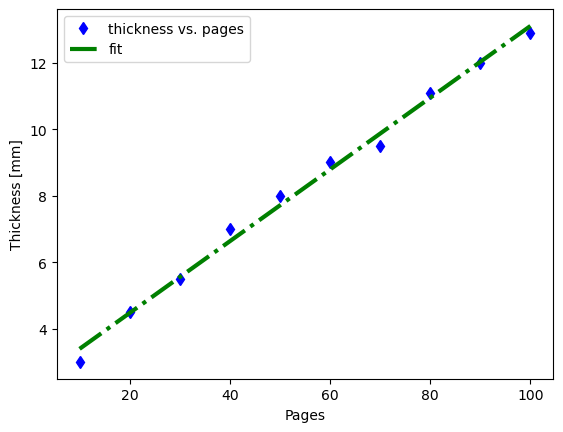

In [10]:
# Now we plot the data and the fit
fig, ax = plt.subplots()

ax.plot(pages,thickness,color='blue', marker = "d", linestyle=" ", linewidth=3, label="thickness vs. pages") 
ax.plot(pages,fit_thickness,color='green', linestyle="-.", linewidth=3, label="fit") 
ax.set_xlabel('Pages')
ax.set_ylabel('Thickness [mm]')
ax.legend()
plt.show()

### 2. Using Scipy functions


The function **curve_fit()** from the scipy.optimize package can be used.

See documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [11]:
from scipy.optimize import curve_fit

In [12]:
#define a function to fit to the data
def func(x, a, b):
    return a * x + b

In [13]:
# Call curve_fit()

coef, cova = curve_fit(func, pages, thickness)

print(coef, cova)


[0.10793939 2.31333333] [[ 9.46923732e-06 -5.20808055e-04]
 [-5.20808055e-04  3.64565645e-02]]


In [14]:
print('thickness = %.5f * pages + %.5f' % (coef[0], coef[1]))

thickness = 0.10794 * pages + 2.31333


In [15]:
# Define new function

fit_pages2 = func(pages, *coef)

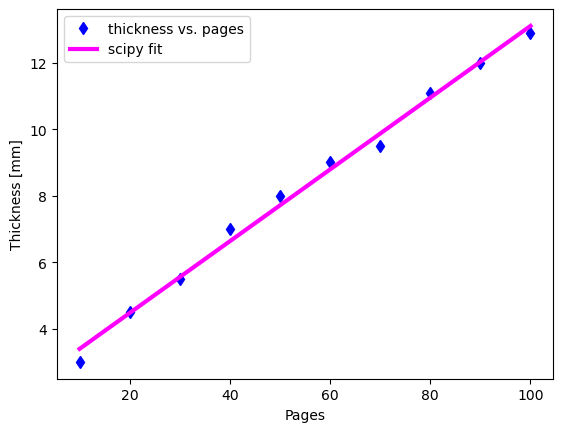

In [16]:
# And now we plot
fig, ax = plt.subplots()

ax.plot(pages,thickness,color='blue', marker = "d", linestyle=" ", linewidth=3, label="thickness vs. pages") 
ax.plot(pages,fit_pages2,color='magenta', linestyle="-", linewidth=3, label="scipy fit") 
ax.set_xlabel('Pages')
ax.set_ylabel('Thickness [mm]')
ax.legend()
plt.show()

### Pearson 'r' coefficient

The Pearson correlation coefficient (r) is an indicator of how strong a linear correlation between 2 variables is.


It can take values between -1 and 1.

In [17]:
# calculate Pearson's r correlation coeficient
from scipy.stats import spearmanr, pearsonr

p1 = pearsonr(pages, thickness)

print('Pearson r coefficients:', p1)

Pearson r coefficients: (0.9967647822032424, 4.774249416992817e-10)


### Spearman's coefficient

The Spearman correlation evaluates the monotonic relationship between 2 variables.


Linearity is not essential.


A monotonic relationship between 2 variables implies one of two situations:


- (Situation 1) As the value of one variable increases, so does the value of the other variable, OR,

- (Situation 2) As the value of one variable increases, the other variable value decreases.


Not necessarily at a constant rate.

In [19]:
# calculate Spearman's r correlation coeficient

p = spearmanr(pages, thickness)

print('Spearman values:', p)

Spearman values: SpearmanrResult(correlation=0.9999999999999999, pvalue=6.646897422032013e-64)


In [20]:
sigma_err = np.sqrt(np.diag(cova))
print(sigma_err)

[0.00307721 0.19093602]
